In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# '/content/drive/MyDrive/cucumber_project/cucumber_image/Augmented Image/Fresh Cucumber' '/content/drive/MyDrive/cucumber_project/cucumber_image/Augmented Image/Fresh CucumberDowny Mildew'

In [ ]:
# Define the directory containing the images
image_dir = '/content/drive/MyDrive/cucumber_project/cucumber_image/Healthy_UnHealthy'

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Define label mappings
label_mapping = {
    'Healthy': 0,
    'Unhealthy': 1
}

# Iterate through the subdirectories in the image directory
for root, dirs, files in os.walk(image_dir):
    # Extract the label from the current subdirectory
    label = os.path.basename(root)
    if label in label_mapping:
        # Iterate through image files in the current subdirectory
        for file in files:
            # Construct the full image path
            image_path = os.path.join(root, file)
            # Append the image path and corresponding label to the lists
            image_paths.append(image_path)
            labels.append(label_mapping[label])

# Create a DataFrame from the lists
df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})


In [ ]:
pd.set_option('display.max_colwidth', None)
df.head()

,Image_Path,Label


In [ ]:
def preprocess_df(df):
    df2 = df.copy()
    df2['Label'] = df2['Label'].astype(str)
    # Train-test split
    train_df, test_df = train_test_split(df2, train_size=0.8, shuffle=True, random_state=1)

    return train_df, test_df

In [ ]:
train_df, test_df = preprocess_df(df)

In [ ]:
import matplotlib.pyplot as plt
import cv2

Healthy = '/content/drive/MyDrive/cucumber_project/cucumber_image/Healthy_UnHealthy/Healthy/Fresh Leaf (586).jpg'
Unhealthy = '/content/drive/MyDrive/cucumber_project/cucumber_image/Healthy_UnHealthy/Unhealthy/O_Unhealthy_IMG_2006.jpg'
# Load two example images
Healthy_image = cv2.imread(Healthy)
Unhealthy_image = cv2.imread(Unhealthy)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left subplot

axes[0].imshow(cv2.cvtColor(Healthy_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Healthy ')

# Plot the second image on the right subplot
axes[1].imshow(cv2.cvtColor(Unhealthy_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Unhealthy ')

# Display the images
plt.show()


In [ ]:
Healthy_image.shape

(1724, 2296, 3)

In [ ]:
Unhealthy_image.shape

(2335, 2599, 3)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image_Path',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image_Path',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode=None,
    batch_size=32,
    shuffle=False
)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 761 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 761 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 191 invalid image filename(s) in x_col="Image_Path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
n_classes = 2

model = models. Sequential([
resize_and_rescale,
data_augmentation,
layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activations'relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activations'relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activations'relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers. Dense(64, activation='relu'),
layers. Dense(n_ classes, activation='sigmod'),
1])
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

10/10 [==============================] - 8s 817ms/step


<ipython-input-80-88e8bdbc4c8c>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = np.squeeze(model.predict(test_images) >= 0.5).astype(np.int)


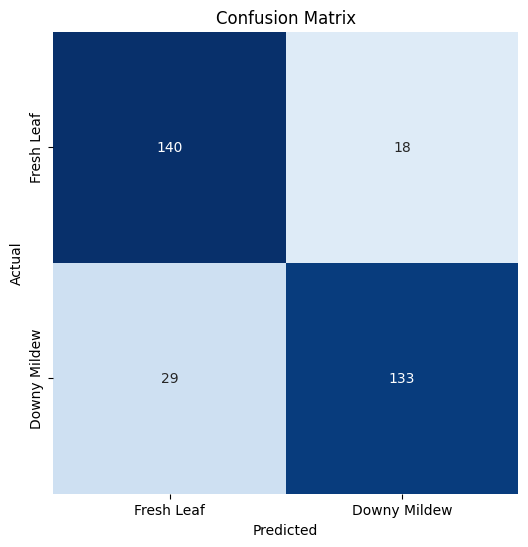

Classification Report:
----------------------
               precision    recall  f1-score   support

  Fresh Leaf       0.83      0.89      0.86       158
Downy Mildew       0.88      0.82      0.85       162

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



In [ ]:
predictions = np.squeeze(model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["Fresh Leaf", "Downy Mildew"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["Fresh Leaf", "Downy Mildew"])
plt.yticks(ticks=[0.5, 1.5], labels=["Fresh Leaf", "Downy Mildew"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
results = model.evaluate(test_images, verbose=0)
print("Accuracy: {:.2f}%".format(results[1] * 100))

Accuracy: 85.31%


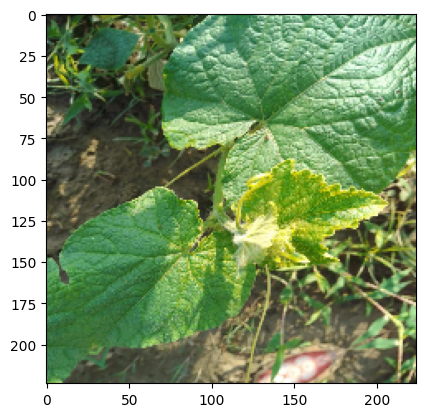

In [ ]:
plt.imshow(train_images[0][0][19])